In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [3]:
!pip install keras
!pip install tensorflow

In [4]:
data=pd.read_csv(r"C:\Users\taman\Downloads\archive (2)\Google_Stock_Train (2010-2022).csv")

In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3272 entries, 0 to 3271
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3272 non-null   object 
 1   Open       3272 non-null   float64
 2   High       3272 non-null   float64
 3   Low        3272 non-null   float64
 4   Close      3272 non-null   float64
 5   Adj Close  3272 non-null   float64
 6   Volume     3272 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 179.1+ KB


In [6]:
data["Close"]=pd.to_numeric(data.Close,errors="coerce")
data=data.dropna()
trainData=data.iloc[:,4:5].values

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3272 entries, 0 to 3271
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3272 non-null   object 
 1   Open       3272 non-null   float64
 2   High       3272 non-null   float64
 3   Low        3272 non-null   float64
 4   Close      3272 non-null   float64
 5   Adj Close  3272 non-null   float64
 6   Volume     3272 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 179.1+ KB


In [8]:
sc=MinMaxScaler(feature_range=(0,1))
trainData=sc.fit_transform(trainData)
trainData.shape


(3272, 1)

In [9]:
X_train=[]
Y_train=[]
for i in range(60,3272):
    X_train.append(trainData[i-60:i,0])
    Y_train.append(trainData[i,0])
X_train,Y_train=np.array(X_train),np.array(Y_train)

In [10]:
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(3212, 60, 1)

In [12]:
model=Sequential()
model.add(LSTM(units=100,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=100,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=100,return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [13]:
hist=model.fit(X_train,Y_train,epochs=20,batch_size=32,verbose=2)

Epoch 1/20
101/101 - 44s - loss: 0.0085 - 44s/epoch - 431ms/step
Epoch 2/20
101/101 - 33s - loss: 0.0014 - 33s/epoch - 327ms/step
Epoch 3/20
101/101 - 31s - loss: 0.0014 - 31s/epoch - 310ms/step
Epoch 4/20
101/101 - 29s - loss: 0.0012 - 29s/epoch - 287ms/step
Epoch 5/20
101/101 - 38s - loss: 0.0012 - 38s/epoch - 380ms/step
Epoch 6/20
101/101 - 45s - loss: 0.0013 - 45s/epoch - 441ms/step
Epoch 7/20
101/101 - 38s - loss: 0.0015 - 38s/epoch - 374ms/step
Epoch 8/20
101/101 - 45s - loss: 0.0012 - 45s/epoch - 441ms/step
Epoch 9/20
101/101 - 51s - loss: 0.0014 - 51s/epoch - 506ms/step
Epoch 10/20
101/101 - 55s - loss: 0.0011 - 55s/epoch - 547ms/step
Epoch 11/20
101/101 - 48s - loss: 0.0010 - 48s/epoch - 472ms/step
Epoch 12/20
101/101 - 52s - loss: 8.7595e-04 - 52s/epoch - 514ms/step
Epoch 13/20
101/101 - 50s - loss: 0.0011 - 50s/epoch - 495ms/step
Epoch 14/20
101/101 - 46s - loss: 9.8392e-04 - 46s/epoch - 451ms/step
Epoch 15/20
101/101 - 46s - loss: 8.8365e-04 - 46s/epoch - 458ms/step
Epoch 1

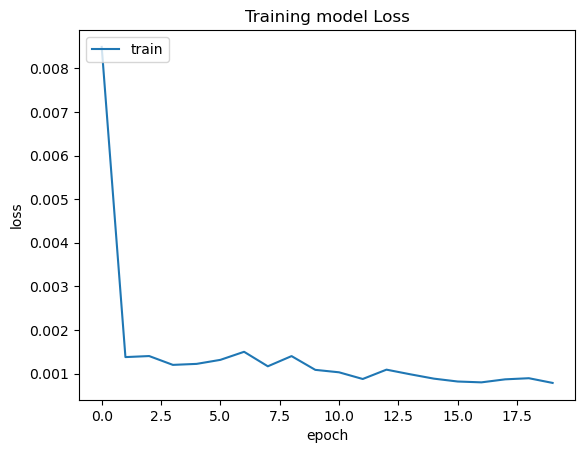

In [15]:
plt.plot(hist.history['loss'])
plt.title('Training model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()

In [18]:
testData=pd.read_csv(r"C:\Users\taman\Downloads\archive (2)\Google_Stock_Test (2023).csv")
testData['Close']=pd.to_numeric(testData.Close,errors='coerce')
testData=testData.dropna()
testData=testData.iloc[:,4:5]
Y_test=testData.iloc[60:,0:].values
inputClosing=testData.iloc[:,0:].values
inputClosing_scaled=sc.transform(inputClosing)
inputClosing_scaled.shape
X_test=[]
length=len(testData)
timestep=60
for i in range(timestep,length):
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(83, 60, 1)

In [19]:
Y_pred=model.predict(X_test)

3/3 [==============================] - 4s 127ms/step


In [20]:
predicted_price=sc.inverse_transform(Y_pred)

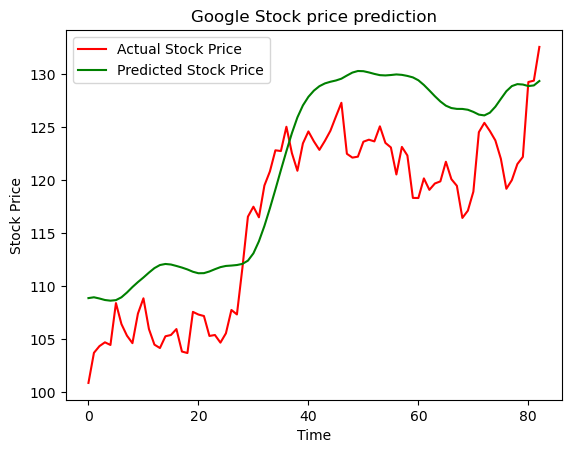

In [21]:
plt.plot(Y_test,color='red',label='Actual Stock Price')
plt.plot(predicted_price,color='green',label='Predicted Stock Price')
plt.title('Google Stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()